In [1]:
import numpy as np
import pandas as pd
from manifoldgsom import GSOM
from AEGSOM import GSOM as GS
import matplotlib.pyplot as plt
from visualize import scatter_basic, scatter_gradient
from sklearn.manifold import TSNE, MDS, Isomap

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
spiral = pd.read_csv('~/data/spiral.csv', header=None)
X = np.array(spiral).astype(float)#[:, :2]
X += abs(np.amin(X))
X /= X.max()

In [4]:
X_r = X[np.random.permutation(X.shape[0])]

In [5]:
adj = np.zeros((X_r.shape[0], X_r.shape[0]))

visited = []
for i in range(X_r.shape[0]):
    visited.append(i)
    neighbors = np.where(np.linalg.norm(X_r - X_r[i], axis = 1)<0.1)[0] 
    adjacent = np.setdiff1d(neighbors, np.array(visited))#np.array(list(neighbors) - visited)
    adj[i][adjacent]=1
   

In [6]:
adj = np.zeros((X_r.shape[0], X_r.shape[0]))

visited = []

for i in range(X_r.shape[0]):
    visited.append(i)
    neighbors = np.argsort(np.linalg.norm(X_r - X_r[i], axis = 1))[:np.log(200).astype(float)]
    adjacent = np.setdiff1d(neighbors, np.array(visited))
#     print adjacent

    adj[i][adjacent] = 1


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
S = []

for i in range(X.shape[0]):
    if not adj[:, i].any():
        S.append(i)


In [8]:
L = []

In [9]:
while len(S)>0:
    n = S.pop()
    L.append(n)
    
    for m in np.where(adj[n])[0]:
        adj[n][m]=0
        if not adj[:, m].any():
            S.append(m)

In [10]:
order = np.array(L)

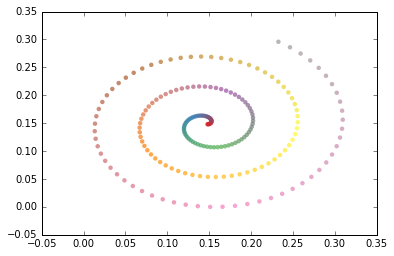

In [11]:
scatter_gradient(X.T[0], X.T[1])

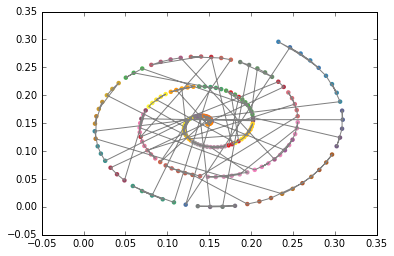

In [12]:
plt.scatter(X_r[order].T[0], X_r[order].T[1],c = plt.cm.Set1(np.array(range(X.shape[0])).astype(float)/X.shape[0]), edgecolors='none')
plt.plot(X_r[order].T[0], X_r[order].T[1], c = 'grey')
plt.show()

In [13]:
# gsom = GSOM(dims=3, min_nodes=10, max_nodes = 1000, fd = 0.9999999, sf=0.9, radius=5,lr=1)
gsom = GS(dims=3, hid = 5, X =X,fd = 0.7, sf=0.3,min_nodes=10, max_nodes=100000, radius=2, gaussian=True, nei=True,lr=1 , map_init=2)

AEGSOM.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X != None:



batch  1
 epoch 1 / 10 :  13% : nodes - 6

AEGSOM.py:274: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  n2 = self.learners[self.grid.keys()[second_neighbours]]
AutoEncoder.py:31: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if w1!= None:


 epoch 1 / 10 :  67% : nodes - 37

AEGSOM.py:264: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  0]]]]


 epoch 10 / 10 :  100% : nodes - 169

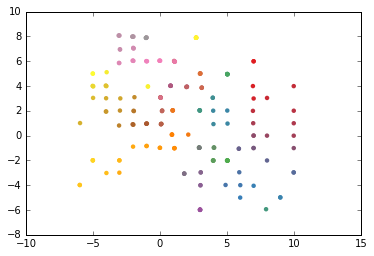

In [14]:
for i in range(1):
    print '\nbatch ', (i+1)
    gsom.train_batch(X=X_r, lr=np.exp(i/3), iterations=10, prune=False)

grid, hits = gsom.predict(X)

plt.scatter(grid.T[0], grid.T[1], c = plt.cm.Set1(np.array(range(X.shape[0])).astype(float)/X.shape[0]), edgecolors='none')
# plt.plot(grid.T[0], grid.T[1], c = 'grey')
plt.show()

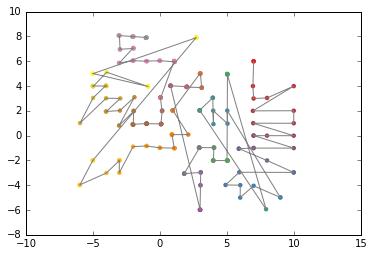

In [15]:
plt.scatter(grid.T[0], grid.T[1], c = plt.cm.Set1(np.array(range(X.shape[0])).astype(float)/X.shape[0]), edgecolors='none')
plt.plot(grid.T[0], grid.T[1], c = 'grey')
plt.show()

In [16]:
tsne = MDS(2).fit(X_r)
scatter_gradient(tsne.T[0], tsne.T[1])

AttributeError: 'MDS' object has no attribute 'T'

In [ ]:
MDS.